<a href="https://colab.research.google.com/github/canalrafael/Pre-Doc/blob/main/EWA_vs_SGD_with_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This notebook aims to compare the operation of SGD with momentum with EWA, using q = 1/t as the decay learning rate for SGD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of iterations
n_iterations = 50

# Generating fictitious gradients
gradients = np.random.randn(n_iterations)  # random gradients

# Parameter for EWA (constant learning rate)
q_constant = 0.1

# Initializing V_t
V_ewa = np.zeros(n_iterations)
V_sgd_momentum = np.zeros(n_iterations)

In [3]:
# Calculating EWA
for t in range(n_iterations):
    if t == 0:
        V_ewa[t] = gradients[t]  # For t=0, V_ewa = g_0
    else:
        V_ewa[t] = (1 - q_constant) * V_ewa[t-1] + q_constant * gradients[t]

In [4]:
# Calculating SGD with momentum using q_t = 1/t
for t in range(n_iterations):
    q_t = 1 / (t + 1)  # q_t = 1/t
    if t == 0:
        V_sgd_momentum[t] = gradients[t]  # For t=0, V_sgd = g_0
    else:
        V_sgd_momentum[t] = (1 - q_t) * V_sgd_momentum[t-1] + q_t * gradients[t]

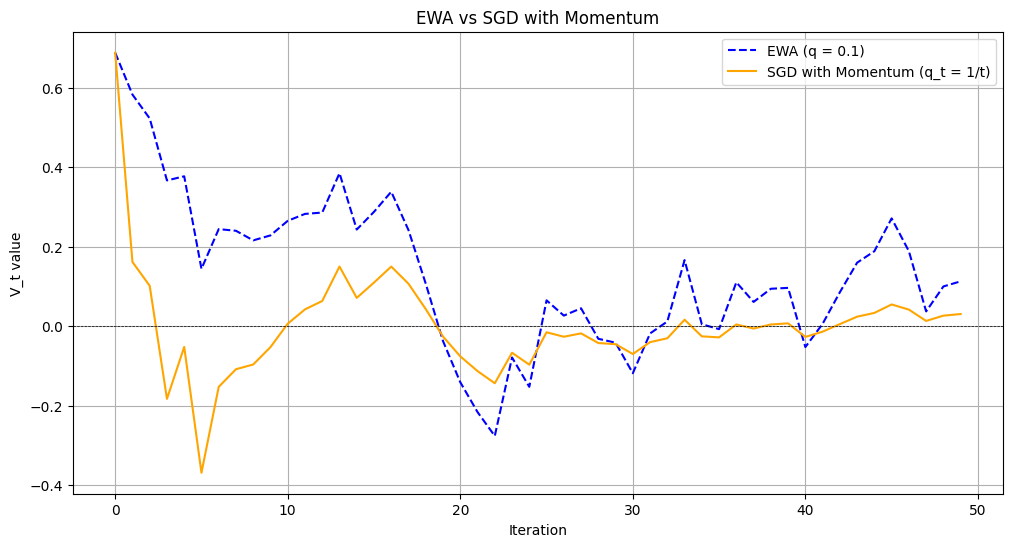

In [5]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(n_iterations), V_ewa, label='EWA (q = 0.1)', color='blue', linestyle='--')
plt.plot(range(n_iterations), V_sgd_momentum, label='SGD with Momentum (q_t = 1/t)', color='orange', linestyle='-')
plt.title('EWA vs SGD with Momentum')
plt.xlabel('Iteration')
plt.ylabel('V_t value')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()